<a href="https://colab.research.google.com/github/ujjawalsingh10/Human-Emotions-Detection/blob/main/Human_Emotions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:


import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install -q kaggle

In [5]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 98% 304M/309M [00:04<00:00, 47.4MB/s]
100% 309M/309M [00:04<00:00, 77.6MB/s]


In [9]:
!unzip '/content/human-emotions-datasethes.zip' -d '/content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsData

In [34]:
train_directory = '/content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/Emotions Dataset/Emotions Dataset/train'
val_directory = '/content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/Emotions Dataset/Emotions Dataset/test'
CLASS_NAMES = ['angry', 'happy', 'sad'] ##Should match with the name of the directories

CONFIGURATION = {
    'BATCH_SIZE' : 32,
    'IM_SIZE': 256,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 20,
    'DROPOUT_RATE': 0.0,
    'REGULARIZATION_RATE': 0.0,
    'N_FILTERS': 6,
    'KERNEL_SIZE': 3,
    'N_STRIDES': 1,
    'POOL_SIZE': 2,
    'N_DENSE_1': 100,
    'N_DENSE_2': 10,
    'NUM_CLASSES': 3
}

In [22]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99,
)


Found 6799 files belonging to 3 classes.


In [23]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=99,
)


Found 2278 files belonging to 3 classes.


In [24]:
for i in val_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

### Data Visualization

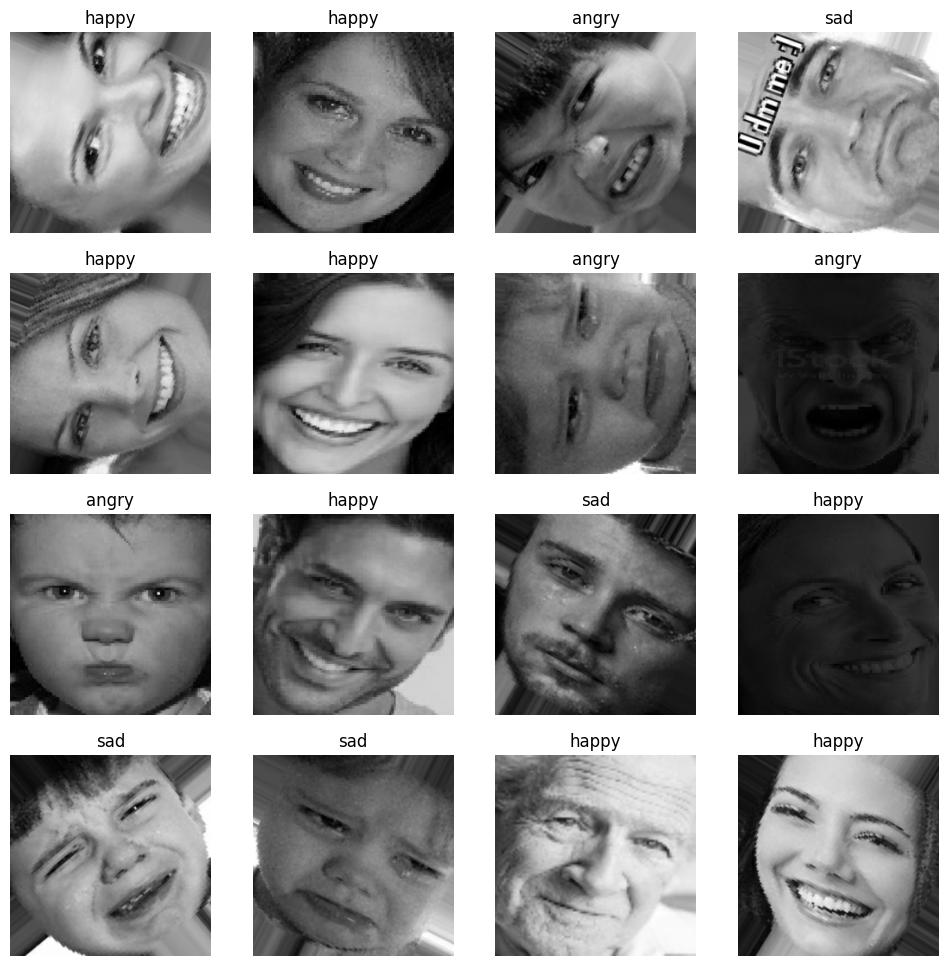

In [28]:
plt.figure(figsize = (12, 12))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255)
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()]) ## Cuz our labels were one hot representations
    plt.axis('off')

### Data Preparation

In [29]:
training_dataset = (train_dataset.prefetch(tf.data.AUTOTUNE))

In [30]:
validation_dataset = (val_dataset.prefetch(tf.data.AUTOTUNE))

In [33]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
    Rescaling(1./255)
])

## Modelling

In [57]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (None, None, 3)),
    resize_rescale_layers,
    Conv2D(filters = CONFIGURATION['N_FILTERS'] , kernel_size = CONFIGURATION['KERNEL_SIZE'], strides = CONFIGURATION['N_STRIDES'] , padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION['POOL_SIZE'], strides= CONFIGURATION['N_STRIDES']*2),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE'] ),

    Conv2D(filters = CONFIGURATION['N_FILTERS']*2 + 4, kernel_size = CONFIGURATION['KERNEL_SIZE'], strides=CONFIGURATION['N_STRIDES'], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION['POOL_SIZE'], strides= CONFIGURATION['N_STRIDES']*2),

    Flatten(),

    Dense( CONFIGURATION['N_DENSE_1'], activation = "relu", kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),

    Dense(CONFIGURATION['NUM_CLASSES'], activation = "softmax"),

])

lenet_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_20 (Bat  (None, 254, 254, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 6)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 6)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 16)     

## Training

In [58]:
loss_function = CategoricalCrossentropy()

In [59]:
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k=2, name = 'top_k_accuracy')]

In [60]:
lenet_model.compile(
    optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [61]:
history = lenet_model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose = 1
)

Epoch 1/20
213/213 [==============================] - 35s 146ms/step - loss: 0.9191 - accuracy: 0.5799 - top_k_accuracy: 0.8322 - val_loss: 1.1480 - val_accuracy: 0.3586 - val_top_k_accuracy: 0.7695
Epoch 2/20
213/213 [==============================] - 24s 110ms/step - loss: 0.6636 - accuracy: 0.7226 - top_k_accuracy: 0.9140 - val_loss: 1.2353 - val_accuracy: 0.4982 - val_top_k_accuracy: 0.7761
Epoch 3/20
213/213 [==============================] - 28s 130ms/step - loss: 0.4856 - accuracy: 0.8122 - top_k_accuracy: 0.9546 - val_loss: 0.8005 - val_accuracy: 0.6782 - val_top_k_accuracy: 0.8911
Epoch 4/20
213/213 [==============================] - 24s 113ms/step - loss: 0.2932 - accuracy: 0.9009 - top_k_accuracy: 0.9797 - val_loss: 0.8413 - val_accuracy: 0.6918 - val_top_k_accuracy: 0.8806
Epoch 5/20
213/213 [==============================] - 23s 106ms/step - loss: 0.2106 - accuracy: 0.9298 - top_k_accuracy: 0.9879 - val_loss: 1.2089 - val_accuracy: 0.5909 - val_top_k_accuracy: 0.8573
Epoch

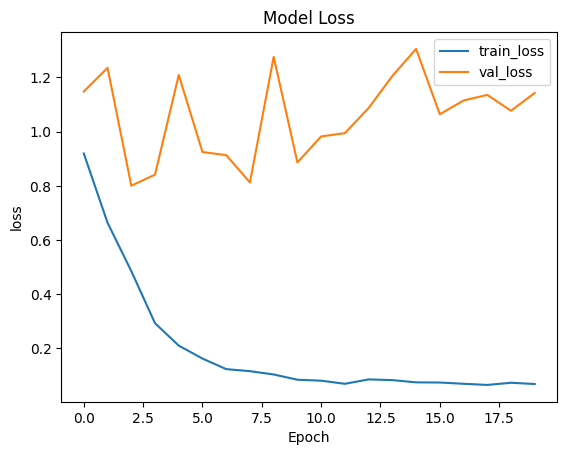

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

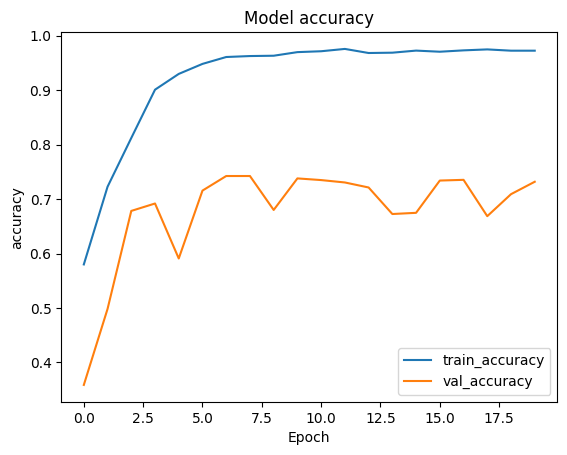

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

### Evaluation

In [64]:
lenet_model.evaluate(validation_dataset)

72/72 [==============================] - 6s 69ms/step - loss: 1.1426 - accuracy: 0.7318 - top_k_accuracy: 0.8964


[1.1425765752792358, 0.7317822575569153, 0.8964003324508667]

## Testing


In [79]:
test_image = cv2.imread('/content/drive/MyDrive/Deep_Learning/Human_Emotions_Detection/dataset/EmotionsDataset_Splitted/data/test/sad/102.jpg')

im = tf.constant(test_image, dtype = tf.float32)

##adding the batch dimension
im = tf.expand_dims(im, axis  = 0)

print(CLASS_NAMES[tf.argmax(lenet_model(im), axis = -1).numpy()[0]])

sad


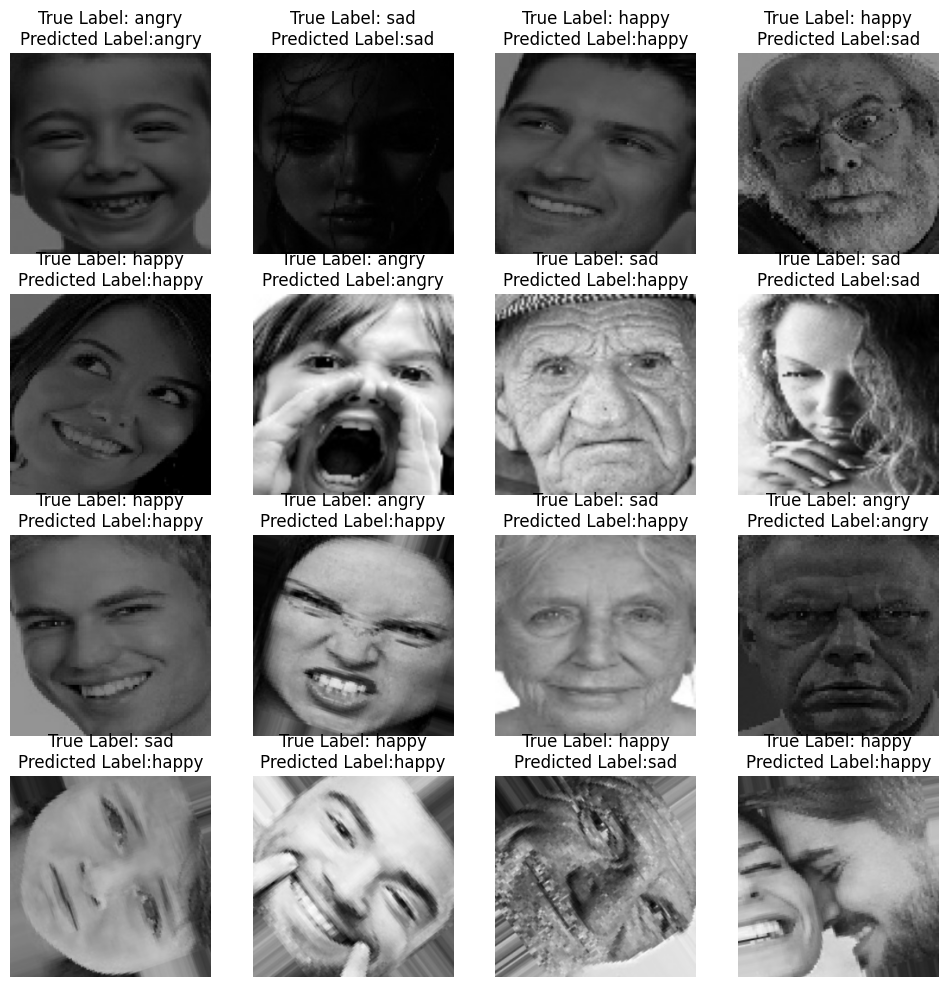

In [80]:
plt.figure(figsize = (12, 12))
for images, labels in validation_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255)
    plt.title("True Label: " + CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()] + "\n" + "Predicted Label:" + CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)), axis = -1).numpy()[0]])
    plt.axis('off')

## Confusion Matrix

In [81]:
predicted = []
labels = []

for im, label in validation_dataset:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [88]:
## We get softmax 3 output values from model inference..we get single value o/p with argmax and get it in a single list with flatten
## We first take all the batches except the uneven last one...then concat it with the last remaining ones
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[1 1 1 ... 0 0 1]
[1 1 2 ... 0 0 1]


In [91]:
pred = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[296  37  58]
 [ 94 803 131]
 [125 166 568]]


Text(0.5, 58.7222222222222, 'Predicted')

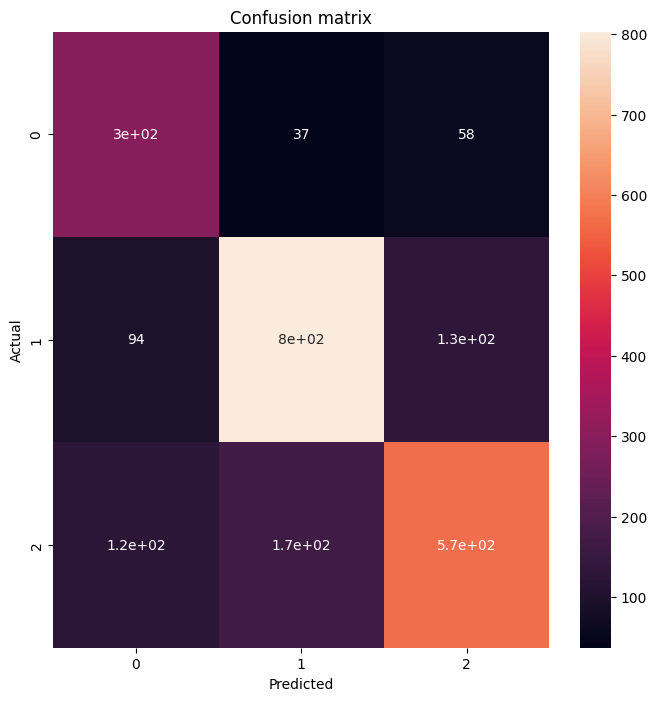

In [92]:
# threshold = 0.5
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize = (8,8))

sns.heatmap(cm, annot = True)
plt.title(f'Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')